In [1]:
%matplotlib inline
import openmc
from IPython.display import Image
from dagmc_geometry_slice_plotter import plot_axis_slice
import math
import os
import matplotlib.pyplot as plt
import numpy as np

In [48]:
#materials

skin=openmc.Material(name='skin')
skin.add_element('H',10.0)
skin.add_element('C',19.9)
skin.add_element('N',4.2)
skin.add_element('O',65.0)
skin.add_element('Na',0.2)
skin.add_element('P',0.1)
skin.add_element('S',0.2)
skin.add_element('Cl',0.3)
skin.add_element('K',0.1)
skin.set_density('g/cm3', 1.089)
skin.id=1

mandible=openmc.Material(name='mandible')
mandible.add_element('H',7.7)
mandible.add_element('C',33.2)
mandible.add_element('N',3.0)
mandible.add_element('O',42.0)
mandible.add_element('Na',0.2)
mandible.add_element('Mg',0.1)
mandible.add_element('P',4.1)
mandible.add_element('S',0.2)
mandible.add_element('Cl',0.1)
mandible.add_element('K',0.1)
mandible.add_element('Ca',9.3)
mandible.set_density('g/cm3',1.271)
mandible.id=6

thoraicspine=openmc.Material(name='thoraicspine')
thoraicspine.add_element('H',10.0)
thoraicspine.add_element('C',40.3)
thoraicspine.add_element('N',2.8)
thoraicspine.add_element('O',43.1)
thoraicspine.add_element('Na',0.1)
thoraicspine.add_element('P',1.0)
thoraicspine.add_element('S',0.2)
thoraicspine.add_element('Cl',0.2)
thoraicspine.add_element('K',0.1)
thoraicspine.add_element('Ca',2.1)
thoraicspine.add_element('Fe',0.1)
thoraicspine.set_density('g/cm3',1.070)
thoraicspine.id=7

sacrum=openmc.Material(name='sacrum')
sacrum.add_element('H',10.5)
sacrum.add_element('C',42.6)
sacrum.add_element('N',2.7)
sacrum.add_element('O',42.6)
sacrum.add_element('Na',0.1)
sacrum.add_element('P',0.3)
sacrum.add_element('S',0.2)
sacrum.add_element('Cl',0.2)
sacrum.add_element('K',0.1)
sacrum.add_element('Ca',0.6)
sacrum.add_element('Fe',0.1)
sacrum.set_density('g/cm3',1.033)
sacrum.id=8

ribs=openmc.Material(name='ribs')
ribs.add_element('H',8.8)
ribs.add_element('C',34.6)
ribs.add_element('N',3.1)
ribs.add_element('O',44.4)
ribs.add_element('Na',0.1)
ribs.add_element('Mg',0.1)
ribs.add_element('P',2.6)
ribs.add_element('S',0.2)
ribs.add_element('Cl',0.1)
ribs.add_element('K',0.1)
ribs.add_element('Ca',5.8)
ribs.add_element('Fe',0.1)
ribs.set_density('g/cm3',1.170)
ribs.id=9

pelvis=openmc.Material(name='pelvis')
pelvis.add_element('H',9.4)
pelvis.add_element('C',40.9)
pelvis.add_element('N',2.6)
pelvis.add_element('O',40.0)
pelvis.add_element('Na',0.1)
pelvis.add_element('Mg',0.1)
pelvis.add_element('P',2.0)
pelvis.add_element('S',0.2)
pelvis.add_element('Cl',0.1)
pelvis.add_element('K',0.1)
pelvis.add_element('Ca',4.5)
pelvis.set_density('g/cm3',1.121)
pelvis.id=10

lumbarspine=openmc.Material(name='lumbarspine')
lumbarspine.add_element('H',9.5)
lumbarspine.add_element('C',38.0)
lumbarspine.add_element('N',3.0)
lumbarspine.add_element('O',43.6)
lumbarspine.add_element('Na',0.1)
lumbarspine.add_element('P',1.6)
lumbarspine.add_element('S',0.2)
lumbarspine.add_element('Cl',0.2)
lumbarspine.add_element('K',0.1)
lumbarspine.add_element('Ca',3.6)
lumbarspine.add_element('Fe',0.1)
lumbarspine.set_density('g/cm3',1.108)
lumbarspine.id=11

clavicles=openmc.Material(name='clavicles')
clavicles.add_element('H',8.9)
clavicles.add_element('C',40.9)
clavicles.add_element('N',2.5)
clavicles.add_element('O',38.5)
clavicles.add_element('Na',0.1)
clavicles.add_element('P',2.7)
clavicles.add_element('S',0.2)
clavicles.add_element('Cl',0.1)
clavicles.add_element('K',0.1)
clavicles.add_element('Ca',6.0)
clavicles.set_density('g/cm3',1.157)
clavicles.id=12

cervicalspine=openmc.Material(name='cervicalspine')
cervicalspine.add_element('H',10.3)
cervicalspine.add_element('C',41.6)
cervicalspine.add_element('N',2.8)
cervicalspine.add_element('O',42.8)
cervicalspine.add_element('Na',0.1)
cervicalspine.add_element('P',0.6)
cervicalspine.add_element('S',0.2)
cervicalspine.add_element('Cl',0.2)
cervicalspine.add_element('K',0.1)
cervicalspine.add_element('Ca',1.2)
cervicalspine.add_element('Fe',0.1)
cervicalspine.set_density('g/cm3',1.049)
cervicalspine.id=13

cartilage=openmc.Material(name='cartilage')
cartilage.add_element('H',9.6)
cartilage.add_element('C',9.9)
cartilage.add_element('N',2.2)
cartilage.add_element('O',74.4)
cartilage.add_element('Na',0.5)
cartilage.add_element('P',2.2)
cartilage.add_element('S',0.9)
cartilage.add_element('Cl',0.3)
cartilage.set_density('g/cm3',1.099)
cartilage.id=14

scapulae=openmc.Material(name='scapulae')
scapulae.add_element('H',8.4)
scapulae.add_element('C',37.3)
scapulae.add_element('N',2.7)
scapulae.add_element('O',40.4)
scapulae.add_element('Na',0.1)
scapulae.add_element('Mg',0.1)
scapulae.add_element('P',3.3)
scapulae.add_element('S',0.2)
scapulae.add_element('Cl',0.1)
scapulae.add_element('K',0.1)
scapulae.add_element('Ca',7.3)
scapulae.set_density('g/cm3',1.201)
scapulae.id=15

sternum=openmc.Material(name='sternum')
sternum.add_element('H',10.4)
sternum.add_element('C',42.1)
sternum.add_element('N',2.8)
sternum.add_element('O',42.7)
sternum.add_element('P',0.5)
sternum.add_element('S',0.2)
sternum.add_element('Cl',0.2)
sternum.add_element('K',0.1)
sternum.add_element('Ca',0.9)
sternum.add_element('Fe',0.1)
sternum.set_density('g/cm3',1.041)
sternum.id=16

teeth=openmc.Material(name='teeth')
teeth.add_element('H',2.3)
teeth.add_element('C',9.5)
teeth.add_element('N',2.9)
teeth.add_element('O',42.6)
teeth.add_element('Mg',0.7)
teeth.add_element('P',13.5)
teeth.add_element('Ca',28.5)
teeth.set_density('g/cm3',2.688)
teeth.id=17

eyes=openmc.Material(name='eyes')
eyes.add_element('H',11.2)
eyes.add_element('C',0.4)
eyes.add_element('N',0.1)
eyes.add_element('O',88.3)
eyes.set_density('g/cm3',1.031)
eyes.id=18

bladder=openmc.Material(name='bladder')
bladder.add_element('H',10.5)
bladder.add_element('C',9.6)
bladder.add_element('N',2.6)
bladder.add_element('O',76.1)
bladder.add_element('Na',0.2)
bladder.add_element('P',0.2)
bladder.add_element('S',0.2)
bladder.add_element('Cl',0.3)
bladder.add_element('K',0.3)
bladder.set_density('g/cm3',1.040)
bladder.id=19

colon=openmc.Material(name='colon')
colon.add_element('H',10.5)
colon.add_element('C',11.4)
colon.add_element('N',2.5)
colon.add_element('O',75.0)
colon.add_element('Na',0.1)
colon.add_element('P',0.1)
colon.add_element('S',0.1)
colon.add_element('Cl',0.2)
colon.add_element('K',0.1)
colon.set_density('g/cm3',1.037)
colon.id=2

tongue=openmc.Material(name='tongue')
tongue.add_element('H',10.2)
tongue.add_element('C',14.2)
tongue.add_element('N',3.4)
tongue.add_element('O',71.1)
tongue.add_element('Na',0.1)
tongue.add_element('P',0.2)
tongue.add_element('S',0.3)
tongue.add_element('Cl',0.1)
tongue.add_element('K',0.4)
tongue.set_density('g/cm3',1.050)
tongue.id=20

thyroid=openmc.Material(name='thyroid')
thyroid.add_element('H',10.4)
thyroid.add_element('C',11.8)
thyroid.add_element('N',2.5)
thyroid.add_element('O',74.5)
thyroid.add_element('Na',0.2)
thyroid.add_element('P',0.1)
thyroid.add_element('S',0.1)
thyroid.add_element('Cl',0.2)
thyroid.add_element('K',0.1)
thyroid.add_element('I',0.1)
thyroid.set_density('g/cm3',1.051)
thyroid.id=21

stomach=openmc.Material(name='stomach')
stomach.add_element('H',10.5)
stomach.add_element('C',11.4)
stomach.add_element('N',2.5)
stomach.add_element('O',75.0)
stomach.add_element('Na',0.1)
stomach.add_element('P',0.1)
stomach.add_element('S',0.1)
stomach.add_element('Cl',0.2)
stomach.add_element('K',0.1)
stomach.set_density('g/cm3',1.037)
stomach.id=22

spleen=openmc.Material(name='spleen')
spleen.add_element('H',10.3)
spleen.add_element('C',11.2)
spleen.add_element('N',3.2)
spleen.add_element('O',74.3)
spleen.add_element('Na',0.1)
spleen.add_element('P',0.2)
spleen.add_element('S',0.2)
spleen.add_element('Cl',0.2)
spleen.add_element('K',0.3)
spleen.set_density('g/cm3',1.060)
spleen.id=3

small_intestine=openmc.Material(name='small_intestine')
small_intestine.add_element('H',10.5)
small_intestine.add_element('C',11.4)
small_intestine.add_element('N',2.5)
small_intestine.add_element('O',75.0)
small_intestine.add_element('Na',0.1)
small_intestine.add_element('P',0.1)
small_intestine.add_element('S',0.1)
small_intestine.add_element('Cl',0.2)
small_intestine.add_element('K',0.1)
small_intestine.set_density('g/cm3',1.037)
small_intestine.id=23

pancreas=openmc.Material(name='pancreas')
pancreas.add_element('H',10.5)
pancreas.add_element('C',15.8)
pancreas.add_element('N',2.4)
pancreas.add_element('O',70.4)
pancreas.add_element('Na',0.2)
pancreas.add_element('P',0.2)
pancreas.add_element('S',0.1)
pancreas.add_element('Cl',0.2)
pancreas.add_element('K',0.2)
pancreas.add_element('Ca',0.2)
pancreas.set_density('g/cm3',1.044)
pancreas.id=24

lungs=openmc.Material(name='lungs')
lungs.add_element('H',10.2)
lungs.add_element('C',10.8)
lungs.add_element('N',3.2)
lungs.add_element('O',74.8)
lungs.add_element('Na',0.1)
lungs.add_element('P',0.1)
lungs.add_element('S',0.2)
lungs.add_element('Cl',0.3)
lungs.add_element('K',0.2)
lungs.add_element('Fe',0.1)
lungs.set_density('g/cm3',0.415)
lungs.id=25

liver=openmc.Material(name='liver')
liver.add_element('H',10.2)
liver.add_element('C',13.2)
liver.add_element('N',3.1)
liver.add_element('O',72.3)
liver.add_element('Na',0.2)
liver.add_element('P',0.2)
liver.add_element('S',0.3)
liver.add_element('Cl',0.2)
liver.add_element('K',0.3)
liver.set_density('g/cm3',1.060)
liver.id=26

kidneys=openmc.Material(name='kidneys')
kidneys.add_element('H',10.3)
kidneys.add_element('C',12.6)
kidneys.add_element('N',3.1)
kidneys.add_element('O',72.9)
kidneys.add_element('Na',0.2)
kidneys.add_element('P',0.2)
kidneys.add_element('S',0.2)
kidneys.add_element('Cl',0.2)
kidneys.add_element('K',0.2)
kidneys.add_element('Ca',0.1)
kidneys.set_density('g/cm3',1.053)
kidneys.id=27

humeri=openmc.Material(name='humeri')
humeri.add_element('H',8.1)
humeri.add_element('C',35.4)
humeri.add_element('N',2.8)
humeri.add_element('O',41.0)
humeri.add_element('Na',0.2)
humeri.add_element('Mg',0.1)
humeri.add_element('P',3.7)
humeri.add_element('S',0.2)
humeri.add_element('Cl',0.1)
humeri.add_element('K',0.1)
humeri.add_element('Ca',8.3)
humeri.set_density('g/cm3',1.233)
humeri.id=48

heart=openmc.Material(name='heart')
heart.add_element('H',10.4)
heart.add_element('C',13.5)
heart.add_element('N',2.9)
heart.add_element('O',72.2)
heart.add_element('Na',0.1)
heart.add_element('P',0.2)
heart.add_element('S',0.2)
heart.add_element('Cl',0.2)
heart.add_element('K',0.3)
heart.set_density('g/cm3',1.051)
heart.id=28

breasts=openmc.Material(name='breasts')
breasts.add_element('H',10.6)
breasts.add_element('C',32.4)
breasts.add_element('N',3.0)
breasts.add_element('O',53.5)
breasts.add_element('Na',0.1)
breasts.add_element('P',0.1)
breasts.add_element('S',0.2)
breasts.add_element('Cl',0.1)
breasts.set_density('g/cm3',1.021)
breasts.id=29

brain=openmc.Material(name='brain')
brain.add_element('H',10.7)
brain.add_element('C',14.3)
brain.add_element('N',2.3)
brain.add_element('O',71.3)
brain.add_element('Na',0.2)
brain.add_element('P',0.4)
brain.add_element('S',0.2)
brain.add_element('Cl',0.3)
brain.add_element('K',0.3)
brain.set_density('g/cm3',1.041)
brain.id=4

adrenals=openmc.Material(name='adrenals')
adrenals.add_element('H',10.4)
adrenals.add_element('C',22.8)
adrenals.add_element('N',2.8)
adrenals.add_element('O',63.0)
adrenals.add_element('Na',0.1)
adrenals.add_element('P',0.2)
adrenals.add_element('S',0.3)
adrenals.add_element('Cl',0.2)
adrenals.add_element('K',0.2)
adrenals.set_density('g/cm3',1.036)
adrenals.id=30

prostate=openmc.Material(name='prostate')
prostate.add_element('H',10.5)
prostate.add_element('C',25.1)
prostate.add_element('N',2.7)
prostate.add_element('O',60.7)
prostate.add_element('Na',0.1)
prostate.add_element('P',0.2)
prostate.add_element('S',0.3)
prostate.add_element('Cl',0.2)
prostate.add_element('K',0.2)
prostate.set_density('g/cm3',1.031)
prostate.id=31

oesophagus=openmc.Material(name='oesophagus')
oesophagus.add_element('H',10.4)
oesophagus.add_element('C',22.3)
oesophagus.add_element('N',2.8)
oesophagus.add_element('O',63.5)
oesophagus.add_element('Na',0.1)
oesophagus.add_element('P',0.2)
oesophagus.add_element('S',0.3)
oesophagus.add_element('Cl',0.2)
oesophagus.add_element('K',0.2)
oesophagus.set_density('g/cm3',1.037)
oesophagus.id=32

wrist_and_hand_bones=openmc.Material(name='wrist_and_hand_bones')
wrist_and_hand_bones.add_element('H',9.6)
wrist_and_hand_bones.add_element('C',50.4)
wrist_and_hand_bones.add_element('N',1.7)
wrist_and_hand_bones.add_element('O',30.8)
wrist_and_hand_bones.add_element('Na',0.1)
wrist_and_hand_bones.add_element('P',2.2)
wrist_and_hand_bones.add_element('S',0.2)
wrist_and_hand_bones.add_element('Cl',0.1)
wrist_and_hand_bones.add_element('Ca',4.9)
wrist_and_hand_bones.set_density('g/cm3',1.109)
wrist_and_hand_bones.id=33

ulnae_and_radii=openmc.Material(name='ulnae_and_radii')
ulnae_and_radii.add_element('H',9.6)
ulnae_and_radii.add_element('C',50.4)
ulnae_and_radii.add_element('N',1.7)
ulnae_and_radii.add_element('O',30.8)
ulnae_and_radii.add_element('Na',0.1)
ulnae_and_radii.add_element('P',2.2)
ulnae_and_radii.add_element('S',0.2)
ulnae_and_radii.add_element('Cl',0.1)
ulnae_and_radii.add_element('Ca',4.9)
ulnae_and_radii.set_density('g/cm3',1.109)
ulnae_and_radii.id=34

tibiae_fibulae=openmc.Material(name='tibiae_fibulae')
tibiae_fibulae.add_element('H',9.6)
tibiae_fibulae.add_element('C',50.4)
tibiae_fibulae.add_element('N',1.7)
tibiae_fibulae.add_element('O',30.8)
tibiae_fibulae.add_element('Na',0.1)
tibiae_fibulae.add_element('P',2.2)
tibiae_fibulae.add_element('S',0.2)
tibiae_fibulae.add_element('Cl',0.1)
tibiae_fibulae.add_element('Ca',4.9)
tibiae_fibulae.set_density('g/cm3',1.109)
tibiae_fibulae.id=35

spinal_cord=openmc.Material(name='spinal_cord')
spinal_cord.add_element('H',9.6)
spinal_cord.add_element('C',50.4)
spinal_cord.add_element('N',1.7)
spinal_cord.add_element('O',30.8)
spinal_cord.add_element('Na',0.1)
spinal_cord.add_element('P',2.2)
spinal_cord.add_element('S',0.2)
spinal_cord.add_element('Cl',0.1)
spinal_cord.add_element('Ca',4.9)
spinal_cord.set_density('g/cm3',1.109)
spinal_cord.id=36

femora=openmc.Material(name='femora')
femora.add_element('H',9.6)
femora.add_element('C',50.4)
femora.add_element('N',1.7)
femora.add_element('O',30.8)
femora.add_element('Na',0.1)
femora.add_element('P',2.2)
femora.add_element('S',0.2)
femora.add_element('Cl',0.1)
femora.add_element('Ca',4.9)
femora.set_density('g/cm3',1.109)
femora.id=37

ankles_and_foot_bones=openmc.Material(name='ankles_and_foot_bones')
ankles_and_foot_bones.add_element('H',9.6)
ankles_and_foot_bones.add_element('C',50.4)
ankles_and_foot_bones.add_element('N',1.7)
ankles_and_foot_bones.add_element('O',30.8)
ankles_and_foot_bones.add_element('Na',0.1)
ankles_and_foot_bones.add_element('P',2.2)
ankles_and_foot_bones.add_element('S',0.2)
ankles_and_foot_bones.add_element('Cl',0.1)
ankles_and_foot_bones.add_element('Ca',4.9)
ankles_and_foot_bones.set_density('g/cm3',1.109)
ankles_and_foot_bones.id=38

ureter=openmc.Material(name='ureter')
ureter.add_element('H',10.5)
ureter.add_element('C',25.1)
ureter.add_element('N',2.7)
ureter.add_element('O',60.7)
ureter.add_element('Na',0.1)
ureter.add_element('P',0.2)
ureter.add_element('S',0.3)
ureter.add_element('Cl',0.2)
ureter.add_element('K',0.2)
ureter.set_density('g/cm3',1.031)
ureter.id=39

trachea=openmc.Material(name='trachea')
trachea.add_element('H',10.5)
trachea.add_element('C',25.1)
trachea.add_element('N',2.7)
trachea.add_element('O',60.7)
trachea.add_element('Na',0.1)
trachea.add_element('P',0.2)
trachea.add_element('S',0.3)
trachea.add_element('Cl',0.2)
trachea.add_element('K',0.2)
trachea.set_density('g/cm3',1.031)
trachea.id=40

thymus=openmc.Material(name='thymus')
thymus.add_element('H',10.5)
thymus.add_element('C',25.1)
thymus.add_element('N',2.7)
thymus.add_element('O',60.7)
thymus.add_element('Na',0.1)
thymus.add_element('P',0.2)
thymus.add_element('S',0.3)
thymus.add_element('Cl',0.2)
thymus.add_element('K',0.2)
thymus.set_density('g/cm3',1.031)
thymus.id=41

salivary_glands=openmc.Material(name='salivary_glands')
salivary_glands.add_element('H',10.5)
salivary_glands.add_element('C',25.1)
salivary_glands.add_element('N',2.7)
salivary_glands.add_element('O',60.7)
salivary_glands.add_element('Na',0.1)
salivary_glands.add_element('P',0.2)
salivary_glands.add_element('S',0.3)
salivary_glands.add_element('Cl',0.2)
salivary_glands.add_element('K',0.2)
salivary_glands.set_density('g/cm3',1.031)
salivary_glands.id=42

rectum=openmc.Material(name='rectum')
rectum.add_element('H',10.5)
rectum.add_element('C',25.1)
rectum.add_element('N',2.7)
rectum.add_element('O',60.7)
rectum.add_element('Na',0.1)
rectum.add_element('P',0.2)
rectum.add_element('S',0.3)
rectum.add_element('Cl',0.2)
rectum.add_element('K',0.2)
rectum.set_density('g/cm3',1.031)
rectum.id=43

gall_bladder=openmc.Material(name='gall_bladder')
gall_bladder.add_element('H',10.5)
gall_bladder.add_element('C',25.1)
gall_bladder.add_element('N',2.7)
gall_bladder.add_element('O',60.7)
gall_bladder.add_element('Na',0.1)
gall_bladder.add_element('P',0.2)
gall_bladder.add_element('S',0.3)
gall_bladder.add_element('Cl',0.2)
gall_bladder.add_element('K',0.2)
gall_bladder.set_density('g/cm3',1.031)
gall_bladder.id=44

ET2=openmc.Material(name='ET2')
ET2.add_element('H',10.5)
ET2.add_element('C',25.1)
ET2.add_element('N',2.7)
ET2.add_element('O',60.7)
ET2.add_element('Na',0.1)
ET2.add_element('P',0.2)
ET2.add_element('S',0.3)
ET2.add_element('Cl',0.2)
ET2.add_element('K',0.2)
ET2.set_density('g/cm3',1.031)
ET2.id=45

ET1=openmc.Material(name='ET1')
ET1.add_element('H',10.5)
ET1.add_element('C',25.1)
ET1.add_element('N',2.7)
ET1.add_element('O',60.7)
ET1.add_element('Na',0.1)
ET1.add_element('P',0.2)
ET1.add_element('S',0.3)
ET1.add_element('Cl',0.2)
ET1.add_element('K',0.2)
ET1.set_density('g/cm3',1.031)
ET1.id=46

BB1=openmc.Material(name='BB1')
BB1.add_element('H',10.5)
BB1.add_element('C',25.1)
BB1.add_element('N',2.7)
BB1.add_element('O',60.7)
BB1.add_element('Na',0.1)
BB1.add_element('P',0.2)
BB1.add_element('S',0.3)
BB1.add_element('Cl',0.2)
BB1.add_element('K',0.2)
BB1.set_density('g/cm3',1.031)
BB1.id=47


materials=openmc.Materials([skin, mandible, thoraicspine, sacrum, ribs, pelvis, lumbarspine, clavicles, 
                            cervicalspine, cartilage, scapulae, sternum, teeth, bladder, colon, tongue,
                            thyroid, stomach, adrenals, spleen, small_intestine, pancreas, lungs, liver, kidneys, humeri, heart,
                            breasts, brain, eyes, salivary_glands,
                            prostate, oesophagus,
                            wrist_and_hand_bones, ulnae_and_radii, tibiae_fibulae, spinal_cord, femora, ankles_and_foot_bones,
                            ureter, trachea, thymus, rectum, gall_bladder, ET2, ET1, BB1])


materials.export_to_xml()
#!cat materials.xml

/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=6.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=7.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=8.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=9.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=10.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=11.
  warn

In [49]:
#geometry
dagmc_univ=openmc.DAGMCUniverse(filename='AM.h5m').bounded_universe()
geometry=openmc.Geometry(root=dagmc_univ)
geometry.export_to_xml()
!cat geometry.xml

<?xml version='1.0' encoding='UTF-8'?>
<geometry>
  <cell fill="3" id="10000" region="10000 -10001 10002 -10003 10004 -10005" universe="4"/>
  <dagmc_universe filename="AM.h5m" id="3"/>
  <surface boundary="vacuum" coeffs="-105.0" id="10000" type="x-plane"/>
  <surface boundary="vacuum" coeffs="105.0" id="10001" type="x-plane"/>
  <surface boundary="vacuum" coeffs="-105.0" id="10002" type="y-plane"/>
  <surface boundary="vacuum" coeffs="105.0" id="10003" type="y-plane"/>
  <surface boundary="vacuum" coeffs="-105.0" id="10004" type="z-plane"/>
  <surface boundary="vacuum" coeffs="105.0" id="10005" type="z-plane"/>
</geometry>


/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10000.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10001.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10002.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10003.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10004.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10005.
  warn(msg, IDWarning)
/opt/venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with 

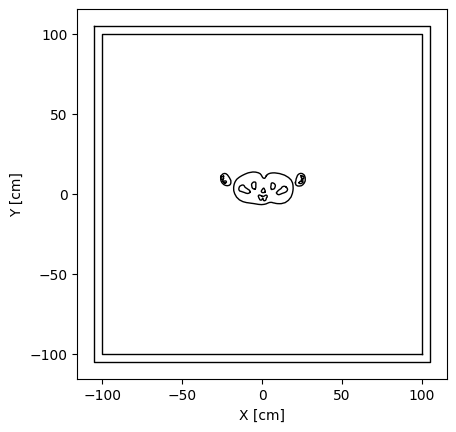

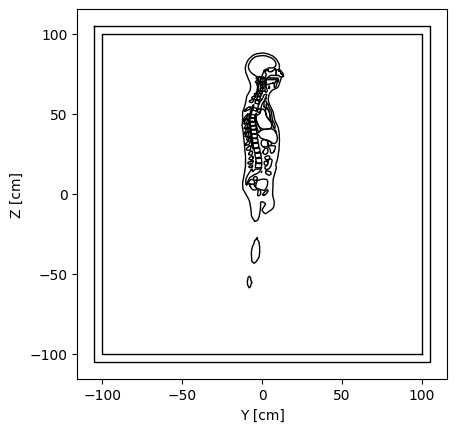

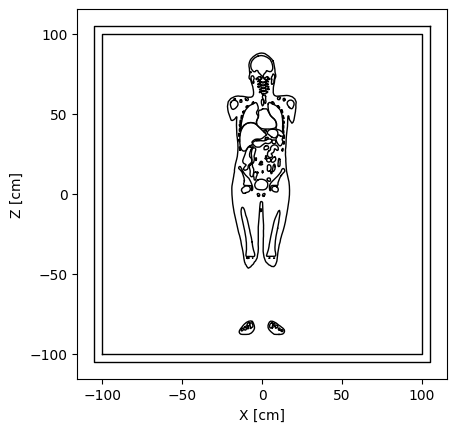

In [50]:
#plotting
plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='AM.h5m',
    view_direction='z',
)

plot.show()

plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='AM.h5m',
    view_direction='x',
)

plot.show()

plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='AM.h5m',
    view_direction='y',
)

plot.show()

In [69]:
#point source
source=openmc.Source()
source.space=openmc.stats.Point((3.07, -30, 46.8))
source.angle = openmc.stats.Isotropic()

#Co60
source.energy = openmc.stats.Discrete([1.1732e6,1.3325e6], [0.5,0.5])

#Cs137
#source.energy = openmc.stats.Discrete([6.617e5], [1.0])
source.particle = 'photon'

In [70]:
#settings
settings=openmc.Settings()
settings.source=source
settings.batches=200
settings.inactive=50
settings.particles=35000

settings.run_mode = "fixed source"
settings.photon_transport = True
settings.DAGMC=True

settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='UTF-8'?>
<settings>
  <run_mode>fixed source</run_mode>
  <particles>35000</particles>
  <batches>200</batches>
  <inactive>50</inactive>
  <source particle="photon" strength="1.0" type="independent">
    <space type="point">
      <parameters>3.07 -30 46.8</parameters>
    </space>
    <angle type="isotropic"/>
    <energy type="discrete">
      <parameters>1173200.0 1332500.0 0.5 0.5</parameters>
    </energy>
  </source>
  <photon_transport>true</photon_transport>
</settings>


In [63]:
#tallies
energy_bins_p, dose_coeffs_p = openmc.data.dose_coefficients(particle='photon', geometry='AP')

energy_function_filter_p = openmc.EnergyFunctionFilter(energy_bins_p, dose_coeffs_p)
energy_function_filter_p.interpolation == 'cubic'

photon_particle_filter = openmc.ParticleFilter(["photon"])
material_filter=openmc.MaterialFilter(brain) #choose your organ/bone

dose_tally = openmc.Tally(name="dose_tally")
dose_tally.scores = ["flux"]
dose_tally.filters = [
    material_filter,
    photon_particle_filter,
    energy_function_filter_p,
]
my_tallies = openmc.Tallies([dose_tally])
my_tallies.export_to_xml()

In [72]:
#running the model
!rm *.h5
openmc.run(tracks=True, threads=8)

rm: cannot remove '*.h5': No such file or directory
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%

In [41]:
#fining the volume of the target
lower_left, upper_right = geometry.bounding_box

material_vol_calc = openmc.VolumeCalculation([teeth], 100000, lower_left, upper_right)

settings = openmc.Settings()
settings.volume_calculations = [material_vol_calc]
settings.run_mode = 'volume'
settings.export_to_xml()

!rm summary.h5
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [73]:
sp=openmc.StatePoint('statepoint.200.h5')

tally=sp.get_tally(name='dose_tally')
df=tally.get_pandas_dataframe()
print(df)

dose_tally_result = sp.get_tally(
            name="dose_tally"
        ).mean.flatten()[0]

photons_per_second = 740000000000  # units of photons per second

# converts units from pSv-cm3/source_photon to pSv-cm3/second
dose_conversion1 = dose_tally_result * photons_per_second

# converts from pSv-cm3/second to pSv/second
dose_conversion2 = dose_conversion1 / 1430.994645

# converts from (pico) pSv/second to (micro) uSv/second
dose_conversion3 = dose_conversion2 * 1e-6

# converts from uSv/second to uSv/hour
dose = dose_conversion3 * 60 * 60

print(f'The tally result is {dose_tally_result} and the dose is {dose:.2f} uSv/h')

   material particle  energyfunction nuclide score     mean  std. dev.
0         4   photon  01667a83cba2e4   total  flux 1.35e-04   1.44e-05
The tally result is 0.00013522147433352063 and the dose is 251.73 uSv/h


In [75]:
os.system('openmc-track-to-vtk tracks.h5 -o tracks.vtk')

0